In [1]:
import numpy as np

#
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib import colors
from matplotlib import cm
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
import matplotlib
matplotlib.rcParams['agg.path.chunksize'] = 10000

from scipy.interpolate import interpn
import math
import warnings
%matplotlib inline
import xarray as xr
#import bisect

warnings.filterwarnings('ignore')

# on the header:
import matplotlib as mpl

In [3]:
import gsw

In [4]:
# ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10a_floats/ocean_flt.nc')
# dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc')

In [2]:
ds = xr.open_dataset('/scratch/project_2000789/muramarg/waom_yearly_floats/output_WAOM_check/ocean_flt.nc')
ds1 = xr.open_dataset('/scratch/project_2000789/muramarg/waom_yearly_floats/output_WAOM_check/ocean_avg_0001.nc')
dg = xr.open_dataset('/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc')

In [3]:
salt = ds.variables['salt'].values
temp = ds.variables['temp'].values
depth = ds.variables['depth'].values

In [4]:
salt.shape

(65717, 5460)

In [4]:
salt_flat = salt.flatten()
temp_flat = temp.flatten()
depth_flat = depth.flatten()
depth_flat = np.nan_to_num(depth_flat)

In [5]:
#x = x[~numpy.isnan(x)]
#salt_flat = salt_flat[~np.isnan(salt_flat)]
#depth_flat = depth_flat[~np.isnan(depth_flat)]
#depth_flat = depth_flat[~np.isnan(depth_flat)]

In [6]:
salt_flat = salt_flat[salt_flat != 0]
temp_flat = temp_flat[temp_flat != 0]

In [7]:
# # make grid for density contours
# ax.set_xlim([34,34.7])
# # ax.set_ylim([-2.7,-1])

smin = 31 - (0.01 * 31)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 35. + (0.01 * 35.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3 + (0.1 * -3)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 3.3 + (0.1 * 3.3)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 20
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-3,3.3,ydim)
si = np.linspace(31,35,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
#print(np.max(dens),np.min(dens))

tmin, tmax, smin, smax sizes=, -3.3 3.63 30.69 35.35


NameError: name 'gsw' is not defined

### create the arrays for neutral density

In [11]:
dens_neut = np.array([[ 24.71689606,  24.91883278,  25.12090874,  25.32289696,  25.52485657,
   25.72688103 , 25.92889404 , 26.13092232 , 26.33299828 , 26.53503227,
   26.73715973 , 26.93921471  ,27.14241028  ,27.34601402  ,27.54989433,
   27.75070953  ,27.94353294 , 28.63241196,  28.98308754, 28.98308754    ],
[ 24.71689606,  24.91883278,  25.12090874,  25.32289696,  25.52485657,
   25.72688103 , 25.92889404 , 26.13092232 , 26.33299828 , 26.53503227,
   26.73715973 , 26.93921471  ,27.14241028  ,27.34601402  ,27.54989433,
   27.75070953  ,27.94353294 , 28.63241196,  28.98308754,  28.98308754      ],
 [ 24.71689606,  24.91883278,  25.12090874,  25.32289696,  25.52485657,
   25.72688103 , 25.92889404 , 26.13092232 , 26.33299828 , 26.53503227,
   26.73715973 , 26.93921471  ,27.14241028  ,27.34601402  ,27.54989433,
   27.75070953  ,27.94353294 , 28.63241196,  28.98308754,28.98308754  ],
 [ 24.71313286 , 24.91477394 , 25.11647034 , 25.31818581  ,25.51997185,
   25.72172546 , 25.92341423 , 26.12518883,  26.32695389 , 26.52869797,
   26.73050308 , 26.93229294 , 27.13504791 , 27.33821678 , 27.54164696,
   27.7422142  , 27.93387222 , 28.5552597  , 28.91858482 ,28.91858482],
 [ 24.70738411 , 24.90876579 , 25.11021423 , 25.31170082 , 25.51305199,
   25.71452713 , 25.91602516 , 26.11743355 , 26.31898117 , 26.52041817,
   26.72193336 , 26.92341232 , 27.12577629 , 27.32852173 , 27.53152275,
   27.73191071 , 27.92254639,  28.4789753  , 28.8517704  , 29.14905739],
 [ 24.69975662 , 24.90088463 , 25.10199547 , 25.30318642 , 25.50432968,
   25.70547485,  25.90666008 , 26.10786438 , 26.30905342 , 26.51026917,
   26.71149445,  26.9126873  , 27.1146183  , 27.3169632 ,  27.51953316,
   27.71981621 , 27.90965462  ,28.40401077 , 28.77214432  ,29.0795536 ],
 [ 24.69028091 , 24.89105415,  25.09194946 , 25.2928524  , 25.49374962,
   25.6946125 ,  25.89553261 , 26.09637833 , 26.29730034 , 26.49825478,
   26.69918442 , 26.90014458 , 27.10159683 , 27.30356216 , 27.50571442,
   27.70590782 , 27.89554596 , 28.31707764 , 28.69371796 , 29.00740814],
 [ 24.6788826  , 24.87939453 , 25.07999802,  25.28060722 , 25.48117638,
   25.68186188 , 25.88243866 , 26.08312035 , 26.28370094 , 26.48443604,
   26.68505287 , 26.88575363 , 27.08674812 , 27.2883358  , 27.49008369,
   27.69023705 , 27.87995338 , 28.22002792 , 28.61616516 , 28.93346214],
 [ 24.66562653 , 24.86592484 , 25.06619453 , 25.26650429 , 25.4668808,
   25.66721725 , 25.86752701 , 26.06794167 , 26.26830673 , 26.46874237,
   26.66911507 , 26.86951637 , 27.07017708 , 27.27131462 , 27.47266197,
   27.67278481,  27.86296654,  28.092659  ,  28.53930855 , 28.85771751],
 [ 24.65052795 , 24.85054398 , 25.05057335 , 25.25064468 , 25.45073128,
   25.650774   , 25.85088348 , 26.05101013 , 26.25109482 , 26.451231,
   26.65131187 , 26.85151482 , 27.05180931 , 27.25252151 , 27.45347404,
   27.6534996  , 27.84414101 , 28.05034637 , 28.46330833  ,28.7783432 ],
 [ 24.63355637 , 24.83339119 , 25.03311157 , 25.23295021 , 25.43276787,
   25.6325531   ,25.83239174 , 26.03218651 , 26.2320385  , 26.43192673,
   26.6317749  , 26.83172035 , 27.03166008 , 27.23199844 , 27.43253708,
   27.63247681 , 27.8237114  , 28.01834106 , 28.38858414 , 28.69993019],
 [ 24.61491394  ,24.81440163 , 25.01390266 , 25.21342468 , 25.41304207,
   25.61253357  ,25.81213379 , 26.01170158 , 26.21125984 , 26.41089249,
   26.61052895  ,26.81011772 , 27.00978851 , 27.20977402 , 27.40987968,
   27.60972595 , 27.80182266 , 27.98947525 , 28.3213501  , 28.62238312],
 [ 24.59440041 , 24.79360771 , 24.99295044  ,25.19223595 , 25.39147949,
   25.59079361  ,25.7900753  , 25.98940468 , 26.18877029 , 26.38808823,
   26.58743286 , 26.78684998 , 26.98615265 , 27.18586349 , 27.38550377,
   27.58516312 , 27.77878189 , 27.96234894 , 28.26257133 , 28.54547119],
 [ 24.57218361 , 24.7711277  , 24.97018242 , 25.16918755 , 25.36826134,
   25.56728363 , 25.76635742 , 25.96536827 , 26.16444778 , 26.36356735,
   26.56266975 , 26.76180458  ,26.96086311 , 27.16026306 , 27.35944557,
   27.55879211 , 27.7533474 ,  27.93611526 , 28.20168877 , 28.46933365],
 [ 24.5481987 ,  24.74694443 , 24.94569016,  25.14442062 , 25.34326935,
   25.54204369 , 25.74079895 , 25.9396553 ,  26.13848686 , 26.33733177,
   26.53620338 , 26.73507118  ,26.93390083 , 27.13297081 , 27.33171082,
   27.53074837 , 27.72612572  ,27.90915489 , 28.13986015 , 28.39437103],
 [ 24.52243805 , 24.72093964 , 24.91951561 , 25.1179657  , 25.31651878,
   25.51508522 , 25.71369553 , 25.91222572 , 26.11079597 , 26.30937958,
   26.50796318 , 26.70662689,  26.90526772 , 27.10399818 , 27.30233574,
   27.5010643  , 27.69707489 , 27.88111115 , 28.08379745 , 28.33390808],
 [ 24.49506569 , 24.69329834 , 24.89158249 , 25.08985901 , 25.28813934,
   25.48644066 , 25.68478012 , 25.88305855 , 26.08143044 , 26.27975845,
   26.47814751 , 26.67650795 , 26.87494278 , 27.0733223  , 27.27133751,
   27.4697628  , 27.66625595 , 27.85202599 , 28.04242706 , 28.28282928],
 [ 24.46591759 , 24.66394806 , 24.86195183 , 25.05997849 , 25.25805283,
   25.45612907  ,25.65417862 , 25.85229301 , 26.05039787,  26.24848557,
   26.44663048 , 26.64472771 , 26.84292603 , 27.04101944 , 27.2387886,
   27.43680763 , 27.63369942 , 27.82089424 , 28.00405693 , 28.23462677],
 [ 24.43512344,  24.63295555 , 24.83068848  ,25.02856064 , 25.22626686,
   25.42415428  ,25.62194633,  25.81985092 , 26.01771355 , 26.21559525,
   26.41346169  ,26.61138916 , 26.80927467 , 27.00706482 , 27.20471191,
   27.4022541  , 27.59948921 , 27.78889084 , 27.96739769,  28.18323135],
 [ 24.40274429 , 24.60030937 , 24.79779625 , 24.99540329 , 25.19295502,
   25.39055443 , 25.58813667 , 25.78577805 , 25.98334312 , 26.18100548,
   26.37866402 , 26.5763855  , 26.77403831 , 26.97160721 , 27.16907501,
   27.36613083 , 27.5632534  , 27.7547226 ,  27.93291092 , 28.13616371]])

In [12]:
ti

array([-3.        , -2.66842105, -2.33684211, -2.00526316, -1.67368421,
       -1.34210526, -1.01052632, -0.67894737, -0.34736842, -0.01578947,
        0.31578947,  0.64736842,  0.97894737,  1.31052632,  1.64210526,
        1.97368421,  2.30526316,  2.63684211,  2.96842105,  3.3       ])

In [13]:
dens

array([[24.82483595, 24.99583026, 25.16682588, 25.33782285, 25.50882118,
        25.67982092, 25.85082207, 26.02182467, 26.19282874, 26.36383429,
        26.53484134, 26.7058499 , 26.87685999, 27.04787161, 27.21888476,
        27.38989945, 27.56091569, 27.73193345, 27.90295275, 28.07397356],
       [24.82457163, 24.99533277, 25.1660954 , 25.33685955, 25.50762526,
        25.67839255, 25.84916144, 26.01993197, 26.19070415, 26.36147799,
        26.53225351, 26.70303073, 26.87380966, 27.0445903 , 27.21537266,
        27.38615674, 27.55694255, 27.72773007, 27.8985193 , 28.06931024],
       [24.82267209, 24.99320125, 25.16373208, 25.33426462, 25.50479888,
        25.67533491, 25.84587272, 26.01641233, 26.18695378, 26.35749706,
        26.5280422 , 26.69858922, 26.86913812, 27.03968891, 27.2102416 ,
        27.38079618, 27.55135267, 27.72191104, 27.89247131, 28.06303346],
       [24.81915518, 24.98945358, 25.15975383, 25.33005595, 25.50035998,
        25.67066593, 25.84097383, 26.01128372, 2

### create the TS diagrams

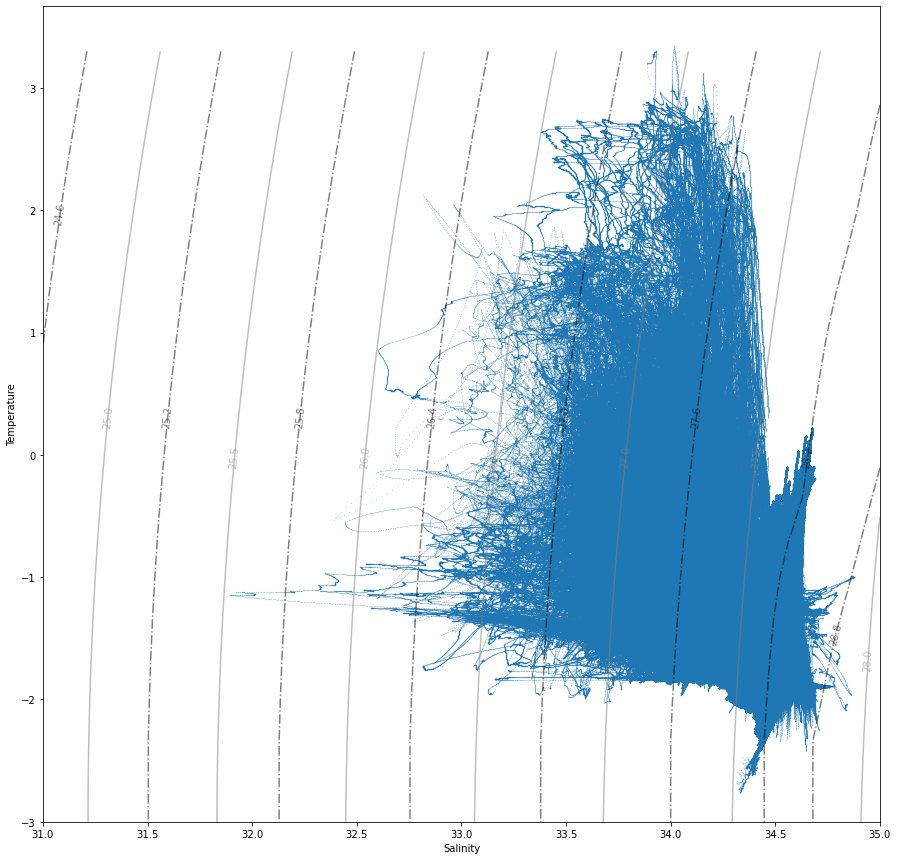

In [14]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 1, 1)
plt.plot(salt_flat,temp_flat,'o',markersize=0.1,zorder=0)

# add the density lines
cs = ax.contour(si, ti, dens, colors="grey", zorder=1,alpha=0.5)
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")
cs = ax.contour(si, ti, dens_neut, colors="black", zorder=1,alpha=0.5,linestyles='-.')
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")

# labels
plt.xlabel('Salinity')
plt.ylabel('Temperature')

plt.show()

In [15]:
# mpl.use('Agg')
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [16]:
# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(1, 1, 1)

# plt.scatter(salt_flat,temp_flat,s=0.1,marker='o',c=depth_flat,cmap='viridis',label='March')

# # add the density lines
# cs = ax.contour(si, ti, dens, colors="grey", zorder=1,alpha=0.5)
# cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")

# # labels
# plt.xlabel('Salinity')
# plt.ylabel('Temperature')

# plt.show()

## Define limits of salinity and temperature

In [17]:
salt_limit = np.arange(34.25,34.75,0.25)
temp_limit = np.arange(-1.7,-2,0.1)

## For each index released at release times, is it within the TS limits

In [18]:
x = (ds.variables['Xgrid'].values)

In [19]:
# Gade line: WDW (Weddell Deep Water)
T_wdw = -2
S_wdw = 34.5
Lf = 334 # kJ/kg
Cp = gsw.cp_t_exact(S_wdw,T_wdw,0)/1000
print(Cp)

Tgade = T_wdw + (Lf/Cp)*(1 - (S_wdw/si))

3.990697896299028


## Plotting all points with polygons

In [20]:
# # make grid for density contours
# ax.set_xlim([34,34.7])
# # ax.set_ylim([-2.7,-1])

smin = 33 - (0.01 * 33)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 35. + (0.01 * 35.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -3 + (0.1 * -3)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 3.3 + (0.1 * 3.3)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 20
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-3,3.3,ydim)
si = np.linspace(33,35,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        #print(si[i],ti[j])
        dens[j,i]=gsw.rho(si[i],ti[j],0)
        # Substract 1000 to convert to sigma-0
dens = dens - 1000
#print(np.max(dens),np.min(dens))

tmin, tmax, smin, smax sizes=, -3.3 3.63 32.67 35.35


In [21]:
depth = ds.variables['depth'].values
rho = ds.variables['rho'].values

In [22]:
# the mask will be based on rho, salt, and temp

# use the values from portella

In [23]:
allpts = np.arange(0,rho.shape[1],1)
allpts

array([   0,    1,    2, ..., 5457, 5458, 5459])

In [24]:
# for each index in each month, find the first values of T and S
hssw_idxs = np.array([],dtype=np.int64)
for idx in allpts:
    thisrow_T = temp[:,int(idx)]
    thisrow_salt = salt[:,int(idx)]
    thisrow_depth = depth[:,int(idx)]
    
    # remove nan values
    thisrow_T = thisrow_T[~np.isnan(thisrow_T)]
    thisrow_salt = thisrow_salt[~np.isnan(thisrow_salt)]
    thisrow_depth = thisrow_depth[~np.isnan(thisrow_depth)]
    
    # test if the first value is within TS limits
    if (len(thisrow_T)>0):
        t1 = thisrow_T[0]
        s1 = thisrow_salt[0]
        if (t1 <= -1.7 and t1 >= -2) and (s1 >= 34.5):
            # add it to the list of indices of interest
            hssw_idxs = np.append(hssw_idxs,int(idx))
print(len(hssw_idxs))

1445


In [25]:
all_salt = ds.variables['salt'].values[:,hssw_idxs]
all_temp = ds.variables['temp'].values[:,hssw_idxs]

In [26]:
all_depth = ds.variables['depth'].values[:,hssw_idxs]

In [27]:
Freez_temp = gsw.CT_freezing(si,0,0)

# Get an array of last T and S values of the hssw_idxs

In [28]:
final_s = all_salt[-1]
final_t = all_temp[-1]

In [29]:
with open('/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/TS_nums.txt', 'w') as f:
    for i,j in zip(final_s,final_t):
        f.write(str(i)+"   "+str(j)+"   \n")
f.close()

In [30]:
with open("/scratch/project_2000789/muramarg/statistics/pygamman_f2py-master/pygamman_f2py-master/neutral_densities.txt","r") as g:
    gamma_n = g.read().splitlines() 
    gamma_n = [float(x) for x in gamma_n]

# Looping method of collecting indexes

#### Identify AABW points based on the definition in Descriptive Oceanography

In [31]:
len(gamma_n)
#len(hssw_idxs)

1445

In [32]:
Freez_temp

array([-1.79085645, -1.79694006, -1.80302639, -1.80911543, -1.81520719,
       -1.82130168, -1.8273989 , -1.83349884, -1.83960152, -1.84570694,
       -1.8518151 , -1.857926  , -1.86403964, -1.87015604, -1.87627519,
       -1.88239709, -1.88852176, -1.89464919, -1.90077938, -1.90691234])

In [33]:
(gamma_n[0])

27.897488

In [34]:
print()

In [26]:
# color the points only if their endpoint is within AASW
# salinity < 34.5 and temperature greater than freezing line
# for each index in the previous figure
aabw_idx = np.array([],dtype=np.int64)
gi = 0
for idx in hssw_idxs:
    # get the final point in the row
    thisrow_T = temp[:,int(idx)]
    thisrow_salt = salt[:,int(idx)]
    thisrow_depth = depth[:,int(idx)]
    if gamma_n[gi]>28.27:
        # convert meters to ft
        #print(thisrow_depth[-1])
        if thisrow_depth[-1] < (-3500/3.281):
            #print(thisrow_salt[-1])
            if thisrow_salt[-1]>34.4 and thisrow_salt[-1]<34.75:
                # search sorted to find the closest salt value index
                #test_idx = np.searchsorted(si,thisrow_salt[-1])
                if thisrow_T[-1]<0:
                    # it is within AASW
                    aabw_idx = np.append(aabw_idx,int(idx))
    gi += 1
            
aabw_salt = ds.variables['salt'].values[:,aabw_idx]
aabw_temp = ds.variables['temp'].values[:,aabw_idx]
aabw_cmap = ds.variables['depth'].values[:,aabw_idx]
# for i in range(len(aasw_cmap)):
#      aasw_cmap[i][:]=i
print(len(aabw_idx))

NameError: name 'hssw_idxs' is not defined

In [31]:
aabw_cmap = ds.variables['depth'].values[:,aabw_idx]

In [36]:
aabw_cmap*=-1

In [37]:
# get first values in the array
firstsalts = np.array([],dtype=np.int64)
for i in range(len(aabw_salt[0])):
    thiscol = aabw_salt[:,i]
    firstval = next(x for x in thiscol if not np.isnan(x))
    firstsalts = np.append(firstsalts,firstval)
firsttemps = np.array([],dtype=np.int64)
for i in range(len(aabw_temp[0])):
    thiscol = aabw_temp[:,i]
    firstval = next(x for x in thiscol if not np.isnan(x))
    firsttemps = np.append(firsttemps,firstval)
    
# get the last values in the array
lastsalts = aabw_salt[-1]
lasttemps = aabw_temp[-1]

In [38]:
aabw_cmap

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [2580.5686, 2485.974 , 4252.8047, ..., 2956.37  , 4337.8413,
        3371.6377],
       [2580.5654, 2485.9268, 4253.02  , ..., 2956.4692, 4337.775 ,
        3372.064 ],
       [2580.543 , 2485.8943, 4253.227 , ..., 2956.5654, 4337.7207,
        3372.4856]], dtype=float32)

In [39]:
# plot floats ending as AASW colored by time
figure = plt.figure(figsize=[25, 25])
ax = plt.subplot(1,1,1)
plt.title('AABW')
plt.scatter(aabw_salt,aabw_temp,s=0.1,marker='o',c=aabw_cmap,cmap='viridis')
plt.scatter(firstsalts,firsttemps,marker='X',color='g',label="Starting points")
plt.scatter(lastsalts,lasttemps,marker='X',color='r',label="Endpoints")
#cbar = plt.colorbar(ticks=[0, 2820, 5640, 8460, 11280, 14100, 16920, 19740, 22560])
cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0','30','60','90','120','150','180','210','240'])
cbar.set_label('Depth (m)', rotation=270,labelpad=15)
plt.plot(si,Freez_temp,'-',color='dimgray',label='Seawater Freezing',alpha=0.5,zorder=1)
plt.plot(si,Tgade,'-',color='steelblue',label='Gade Line',alpha=0.5,zorder=2)
plt.ylim([-2.4,0.3])
plt.xlim([33.8,35.1])
plt.legend(loc="best")
cs = ax.contour(si, ti, dens, colors="silver", zorder=1,alpha=0.5)
#ax.contour(si,ti,Freez_temp, colors="grey", zorder=1,alpha=0.5)
cl=plt.clabel(cs,fontsize=10,inline=False,fmt="%.1f")

plt.savefig("aabw_points.png", dpi=300)
plt.close()

### Write the indexes to a text file

In [40]:
#aasw_idx, mcdw_idx, dsw_idx, isw_idx
f = open("aabw_idxs.txt", "w")

content = str(aabw_idx)
f.write(content)

f.close()

### Create a density and residence time map of these

In [30]:
alist = [line.rstrip() for line in open('aabw_idxs.txt')]
aabw_idx = np.array([])
for line in alist:
    thisline = line.split()
    for i in thisline:
        aabw_idx = np.append(aabw_idx,int(i))
aabw_idx = aabw_idx.astype(int)

In [19]:
import time

In [20]:
x = (ds.variables['Xgrid'].values[:,aabw_idx])
y = (ds.variables['Ygrid'].values[:,aabw_idx])
print(x.shape)
#depth = (ds.variables['depth'][-1].values)

# divide the normal grid by 10
xbins = np.r_[0:630:1]
ybins = np.r_[0:560:1]
print(xbins.shape,ybins.shape)

# index of bins the particles ending in
x_new = np.digitize(x,xbins)
y_new = np.digitize(y,ybins)

print(x_new)

m2 = []
for i in range(len(xbins)):
    newl = []
    for j in range(len(ybins)):
        newl.append([])
        
    m2.append(newl)
    
# each bin has an average or total time that any one particle spends in it

# for each column\
start_time = time.time()
for i in range(x_new.shape[1]):
#for i in range(1000):
    if i % 1000 == 0:
        print(i,'of',x_new.shape[1],'in',(time.time()-start_time)/60)
    # get the x and y column values
    thisx = x_new[:,i]
    thisy = y_new[:,i]

    # make a stack of the x and y columns
    pts = np.vstack((thisx,thisy))
    pts = pts.T

    # normalize to the total number of particles
    counts = list(zip(*np.unique(pts, return_counts = True, axis = 0)))
    counts.pop()
    
    # add each count to a list in the mesh
    for ii in counts[:-1]:
        iind = ii[0][0]
        jind = ii[0][1]
        
        # create the mesh without the scaling by time
        myval = (ii[1]*900)/86400 # current sum of the column totals

        # see if the current number of the mesh is zero, if it is, add to list
        #print(m2[iind][jind])
        
        m2[int(iind)][int(jind)].append(myval)
#print(m2)

(65717, 349)
(630,) (560,)
[[630 630 630 ... 630 630 630]
 [630 630 630 ... 630 630 630]
 [630 630 630 ... 630 630 630]
 ...
 [518 502 527 ... 463 535 515]
 [518 502 527 ... 463 535 515]
 [518 502 527 ... 463 535 515]]
0 of 349 in 3.1391779581705728e-06


In [21]:
# AVERAGE MESH
mesh = np.zeros((len(xbins),len(ybins)))

# create the mesh based on averages of m2
for ii in range(len(m2)):
    for jj in range(len(m2[ii])):
        if len(m2[ii][jj])>0:
            avg = sum(m2[ii][jj])/len(m2[ii][jj])
            if avg<200:
                mesh[ii][jj] = avg
            else:
                print(avg)

# MAX MESH
mesh_max = np.zeros((len(xbins),len(ybins)))

# create the mesh based on maximum values of m2
for ii in range(len(m2)):
    for jj in range(len(m2[ii])):
        if len(m2[ii][jj])>0:
            avg = max(m2[ii][jj])
            #print(avg)
            mesh_max[ii][jj] = avg
            #else:
            #    print(avg)
# MIN MESH
mesh_min = np.zeros((len(xbins),len(ybins)))

# create the mesh based on maximum values of m2
for ii in range(len(m2)):
    for jj in range(len(m2[ii])):
        if len(m2[ii][jj])>0:
            avg = min(m2[ii][jj])
            if avg<200:
                mesh_min[ii][jj] = avg
            #else:
            #    print(avg)

# STDEV MESH
mesh_std = np.zeros((len(xbins),len(ybins)))

# create the mesh based on maximum values of m2
for ii in range(len(m2)):
    for jj in range(len(m2[ii])):
        if len(m2[ii][jj])>0:
            avg = np.std(m2[ii][jj])
            #if avg<200:
            mesh_std[ii][jj] = avg
            
[Xbins, Ybins] = np.meshgrid(ybins,xbins)
print(Xbins.shape)

(630, 560)


In [22]:
# write the mesh to a text file
# # transform the Ybins and Xbins into lat/long points
lat_values = dg.lat_rho.values
long_values = dg.lon_rho.values
print(lat_values.shape)
lat = np.array([])
long = np.array([])

# # interpolate in latitude
x_shape = np.arange(dg.lat_rho.shape[0])
y_shape = np.arange(dg.lat_rho.shape[1])
# for each row
for i,j in zip(Xbins,Ybins):
    # for each column create the long and lat values
    row_long = np.array([])
    row_lat = np.array([])
    
    for a,b in zip(i,j):
        interp_x = a
        interp_y = b
        # interpolate in longitude
        thislong = long_values[interp_x,interp_y]
        # interpolate in latitude
        thislat = lat_values[interp_x,interp_y]
        
        row_long = np.append(row_long,thislong)
        row_lat = np.append(row_lat,thislat)
    
    if len(lat) == 0:
        lat = np.append(lat,row_lat)
        long = np.append(long,row_long)
    else:
        lat = np.vstack((lat,row_lat))
        long = np.vstack((long,row_long))

(560, 630)


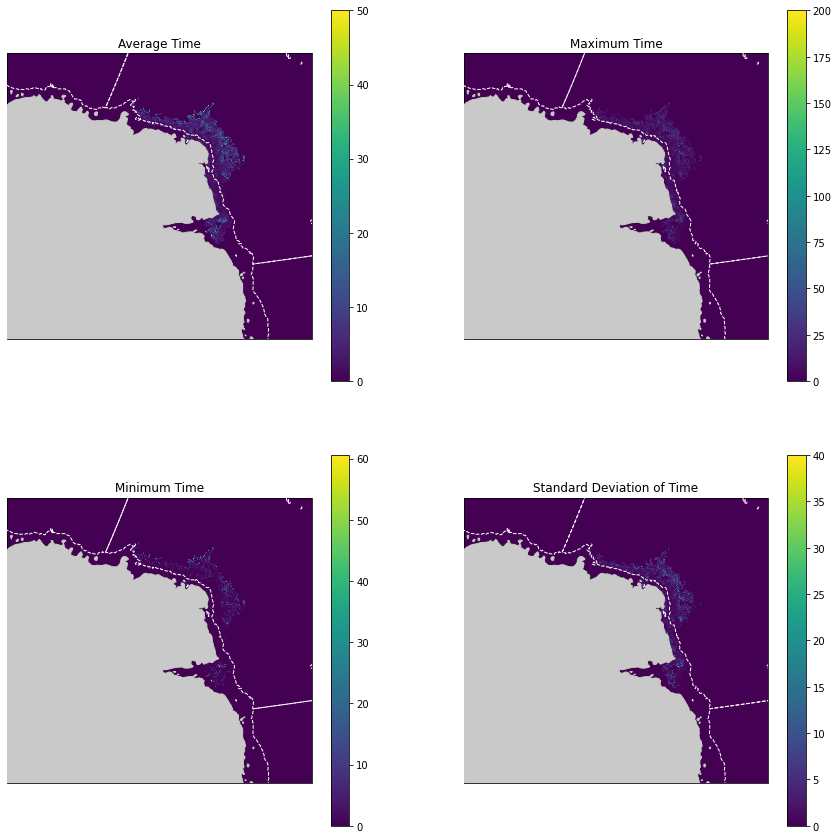

In [23]:
# average values
proj = ccrs.SouthPolarStereo(central_longitude=0.0, true_scale_latitude=None, globe=None)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2, 2, 1, projection=proj)
ax.coastlines(zorder=5,facecolor='white',edgecolor='white')
xlimit = np.arange(350,500,1)
ylimit = np.arange(450,630,1)
plt.pcolormesh(long[300:,250:],lat[300:,250:],mesh[300:,250:],transform=ccrs.PlateCarree(),zorder=2,vmax=50)
plt.colorbar()
plt.title("Average Time")
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[0],zorder=3,linestyles='dashdot', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='white', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)

# maximum values
ax = fig.add_subplot(2, 2, 2, projection=proj)
ax.coastlines(zorder=5,facecolor='white',edgecolor='white')
xlimit = np.arange(350,500,1)
ylimit = np.arange(450,630,1)
plt.pcolormesh(long[300:,250:],lat[300:,250:],mesh_max[300:,250:],transform=ccrs.PlateCarree(),zorder=2,vmax=200)
plt.colorbar()
plt.title("Maximum Time")
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[0],zorder=3,linestyles='dashdot', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='white', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)

# minimum values
ax = fig.add_subplot(2, 2, 3, projection=proj)
ax.coastlines(zorder=5,facecolor='white',edgecolor='white')
xlimit = np.arange(350,500,1)
ylimit = np.arange(450,630,1)
plt.pcolormesh(long[300:,250:],lat[300:,250:],mesh_min[300:,250:],transform=ccrs.PlateCarree(),zorder=2)
plt.colorbar()
plt.title("Minimum Time")
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[0],zorder=3,linestyles='dashdot', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='white', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)

# standard deviation
ax = fig.add_subplot(2, 2, 4, projection=proj)
ax.coastlines(zorder=5,facecolor='white',edgecolor='white')
xlimit = np.arange(350,500,1)
ylimit = np.arange(450,630,1)
plt.pcolormesh(long[300:,250:],lat[300:,250:],mesh_std[300:,250:],transform=ccrs.PlateCarree(),zorder=2,vmax=40)
plt.colorbar()
plt.title("Standard Deviation of Time")
plt.contour(dg.lon_rho[xlimit,ylimit], dg.lat_rho[xlimit,ylimit],ds1.zice[xlimit,ylimit],levels=[0],zorder=3,linestyles='dashdot', transform=ccrs.PlateCarree(), cmap=plt.cm.binary)
bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, zorder=3, facecolor='none', edgecolor='white', linestyle='dashed', linewidth=1)
ax.add_feature(cfeature.LAND,facecolor='#c9c9c9',zorder=6)

plt.savefig('aabw_restime.png')



#myds = ds1.temp[xlimit,ylimit]
#ds1.h.isel(xi_rho=slice(350, 630),eta_rho=slice(300,630)).plot(x="lon_rho", y="lat_rho",transform=ccrs.PlateCarree())

### Residence time at different depths

In [24]:
import math

In [33]:
aabw_cmap*=-1

In [34]:
# we will chunk the depths into
a = (aabw_cmap.flatten())
maxa = (max((a[~np.isnan(a)])))
mina = (min((a[~np.isnan(a)])))

# divide depths into containers of 500
mylist = np.r_[math.floor(mina):math.ceil(maxa):500]

In [35]:
mylist

array([   0,  500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

In [36]:
# digitize the numbers in a into the map
depth_bins = np.digitize(aabw_cmap,mylist)
depth_bins

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [ 6,  5,  9, ...,  6,  9,  7],
       [ 6,  5,  9, ...,  6,  9,  7],
       [ 6,  5,  9, ...,  6,  9,  7]])

In [95]:
# divide the normal grid by 10
xbins = np.r_[0:5000:1]
xbins = np.arange(0,5000,500)

# index of bins the particles ending in
x_new = np.digitize(aabw_cmap,xbins)

In [97]:
x_new

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [ 6,  5,  9, ...,  6,  9,  7],
       [ 6,  5,  9, ...,  6,  9,  7],
       [ 6,  5,  9, ...,  6,  9,  7]])

In [37]:
mesh

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])